<a href="https://colab.research.google.com/github/Sharini-19/Sharini-19/blob/main/Covid_19%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Mini_Project/COVID-19_formatted_dataset.csv')
print(dataset)

     Unnamed: 0  ...  Red blood cell distribution width (RDW)
0             1  ...                                -0.625073
1             8  ...                                -0.978899
2            15  ...                                -1.067355
3            18  ...                                 0.171035
4            22  ...                                 0.613318
..          ...  ...                                      ...
593        5602  ...                                 0.347948
594        5614  ...                                 0.967144
595        5615  ...                                -1.155812
596        5618  ...                                -0.448160
597        5643  ...                                -0.182790

[598 rows x 17 columns]


In [5]:
dataset.head()

,Unnamed: 0,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
0,1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
1,8,1,negative,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
2,15,9,negative,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
3,18,11,negative,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
4,22,9,negative,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318


In [6]:
dataset.isnull()

,Unnamed: 0,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
594,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
dataset.drop_duplicates

<bound method DataFrame.drop_duplicates of      Unnamed: 0  ...  Red blood cell distribution width (RDW)
0             1  ...                                -0.625073
1             8  ...                                -0.978899
2            15  ...                                -1.067355
3            18  ...                                 0.171035
4            22  ...                                 0.613318
..          ...  ...                                      ...
593        5602  ...                                 0.347948
594        5614  ...                                 0.967144
595        5615  ...                                -1.155812
596        5618  ...                                -0.448160
597        5643  ...                                -0.182790

[598 rows x 17 columns]>

In [8]:
dataset.isnull().sum()

Unnamed: 0                                          0
Patient age quantile                                0
SARS-Cov-2 exam result                              0
Hematocrit                                          0
Hemoglobin                                          0
Platelets                                           0
Mean platelet volume                                0
Red blood Cells                                     0
Lymphocytes                                         0
Mean corpuscular hemoglobin concentration (MCHC)    0
Leukocytes                                          0
Basophils                                           0
Mean corpuscular hemoglobin (MCH)                   0
Eosinophils                                         0
Mean corpuscular volume (MCV)                       0
Monocytes                                           0
Red blood cell distribution width (RDW)             0
dtype: int64

In [9]:
import seaborn as sns

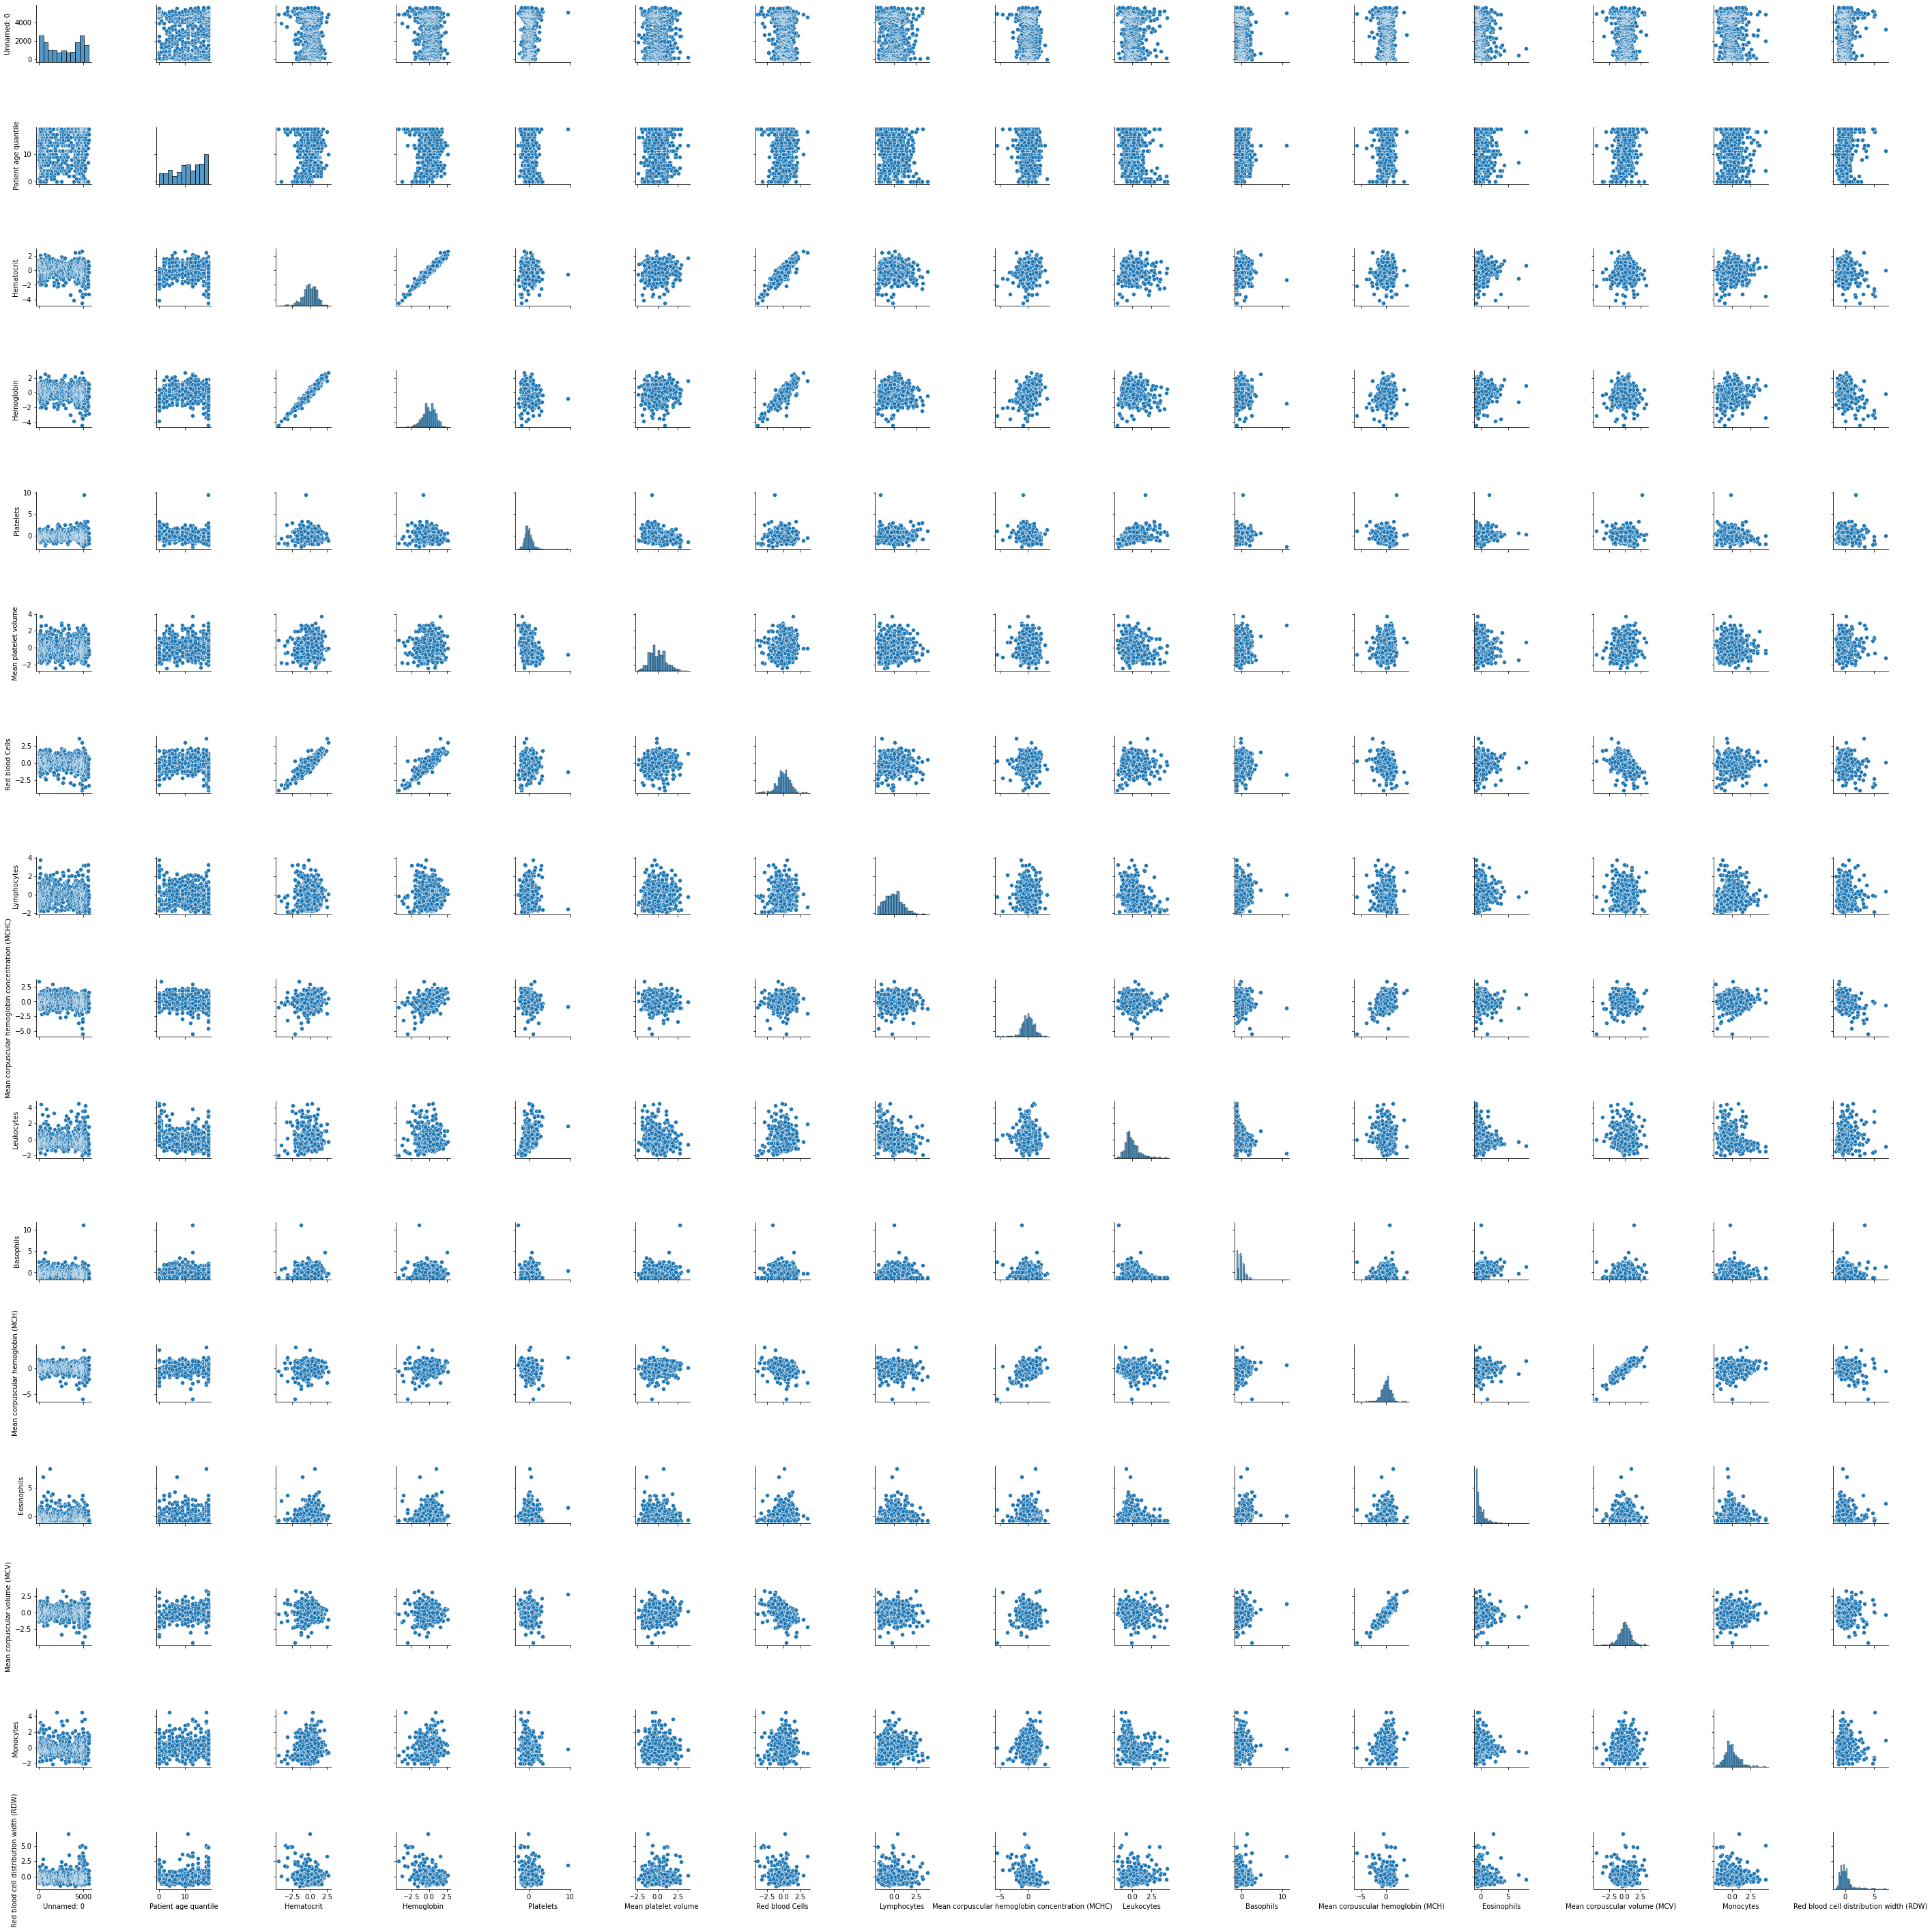

In [22]:
sns.pairplot(dataset)

In [25]:
dataset.describe()

,Unnamed: 0,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,2809.503344,11.142140,0.003075,0.005635,0.006570,-0.000018,-0.009439,-0.000817,0.010023,0.006673,0.000986,0.022934,0.003968,0.021765,-0.003682,-0.019338
std,1848.657778,5.691234,1.002429,1.001255,0.994752,1.001674,0.987838,1.002535,0.991957,1.000308,1.002957,0.950538,1.002782,0.954994,0.998055,0.969622
min,1.000000,0.000000,-4.501420,-4.345603,-2.552426,-2.457575,-3.970608,-1.865070,-5.431808,-2.020303,-1.140144,-5.937604,-0.835508,-4.580812,-2.163721,-1.598094
25%,934.250000,7.000000,-0.518807,-0.523588,-0.605346,-0.662483,-0.567950,-0.737104,-0.552476,-0.635863,-0.529226,-0.501356,-0.666950,-0.514813,-0.614192,-0.625073
50%,2878.000000,12.000000,0.053407,0.040316,-0.109154,-0.101517,0.013852,-0.014267,-0.054585,-0.208705,-0.223767,0.125903,-0.329835,0.076059,-0.115191,-0.182790
75%,4595.750000,16.000000,0.717175,0.729532,0.531498,0.683835,0.661768,0.597692,0.642463,0.458470,0.387152,0.596348,0.344395,0.626871,0.488863,0.325834
max,5643.000000,19.000000,2.662704,2.671868,9.532034,3.713052,3.645706,3.764100,3.331071,4.522042,11.078219,4.098546,8.350876,3.410980,4.533397,6.982184


In [28]:
dataset.isna().any()

Unnamed: 0                                          False
Patient age quantile                                False
SARS-Cov-2 exam result                              False
Hematocrit                                          False
Hemoglobin                                          False
Platelets                                           False
Mean platelet volume                                False
Red blood Cells                                     False
Lymphocytes                                         False
Mean corpuscular hemoglobin concentration (MCHC)    False
Leukocytes                                          False
Basophils                                           False
Mean corpuscular hemoglobin (MCH)                   False
Eosinophils                                         False
Mean corpuscular volume (MCV)                       False
Monocytes                                           False
Red blood cell distribution width (RDW)             False
dtype: bool

In [29]:
dataset['Patient age quantile'].value_counts()

19    60
13    44
11    42
18    41
9     40
17    37
14    35
15    32
16    31
4     28
6     27
7     26
0     26
12    24
10    24
5     20
2     19
3     17
8     14
1     11
Name: Patient age quantile, dtype: int64

In [33]:
Positive_cases=dataset[dataset["SARS-Cov-2 exam result"]=="positive"]
print(Positive_cases)

     Unnamed: 0  ...  Red blood cell distribution width (RDW)
97          568  ...                                 0.967144
135         884  ...                                -0.978899
165        1108  ...                                 0.347948
168        1162  ...                                -0.801985
185        1293  ...                                -0.713529
..          ...  ...                                      ...
585        5553  ...                                -0.978899
587        5564  ...                                -0.890442
588        5566  ...                                 0.171035
592        5585  ...                                -0.094334
597        5643  ...                                -0.182790

[81 rows x 17 columns]


In [34]:
Positive_cases.head()

,Unnamed: 0,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
97,568,2,positive,0.991838,0.792188,-0.341548,1.469188,1.653476,-0.048383,-0.452899,-0.420197,1.303529,-1.442245,-0.498393,-1.396114,1.933339,0.967144
135,884,15,positive,-0.495919,-0.398276,-0.718402,-0.438097,-0.567950,-0.935404,0.244149,-0.820919,-1.140144,0.334989,-0.666950,0.226280,-0.456613,-0.978899
165,1108,14,positive,-0.312811,-0.648900,-0.027502,-0.101517,-0.656101,-0.099557,-1.448681,-0.968407,-0.529226,0.021361,0.175837,0.807138,1.513128,0.347948
168,1162,14,positive,-0.518807,-0.272964,-0.215930,0.459449,-0.515058,-0.457777,0.941197,-0.573250,-0.223767,0.439533,-0.709090,0.066045,2.537393,-0.801985
185,1293,7,positive,0.694287,0.729532,-0.743526,0.235063,0.595655,-0.636887,0.343725,-0.606644,-0.223767,0.125903,-0.119138,-0.014074,0.882811,-0.713529


In [35]:
Negative_cases=dataset[dataset["SARS-Cov-2 exam result"]=="negative"]
print(Negative_cases)

     Unnamed: 0  ...  Red blood cell distribution width (RDW)
0             1  ...                                -0.625073
1             8  ...                                -0.978899
2            15  ...                                -1.067355
3            18  ...                                 0.171035
4            22  ...                                 0.613318
..          ...  ...                                      ...
591        5584  ...                                 0.790231
593        5602  ...                                 0.347948
594        5614  ...                                 0.967144
595        5615  ...                                -1.155812
596        5618  ...                                -0.448160

[517 rows x 17 columns]


In [36]:
Negative_cases.head()

,Unnamed: 0,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
0,1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
1,8,1,negative,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
2,15,9,negative,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
3,18,11,negative,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
4,22,9,negative,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318


In [41]:
from matplotlib import pyplot as plt

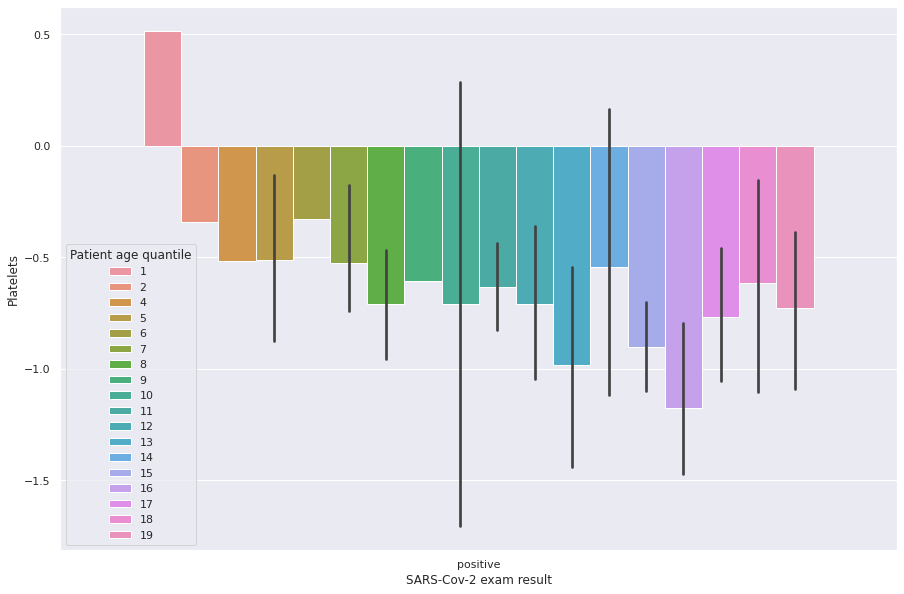

In [42]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="SARS-Cov-2 exam result", y="Platelets",data=Positive_cases,hue="Patient age quantile")
plt.show()

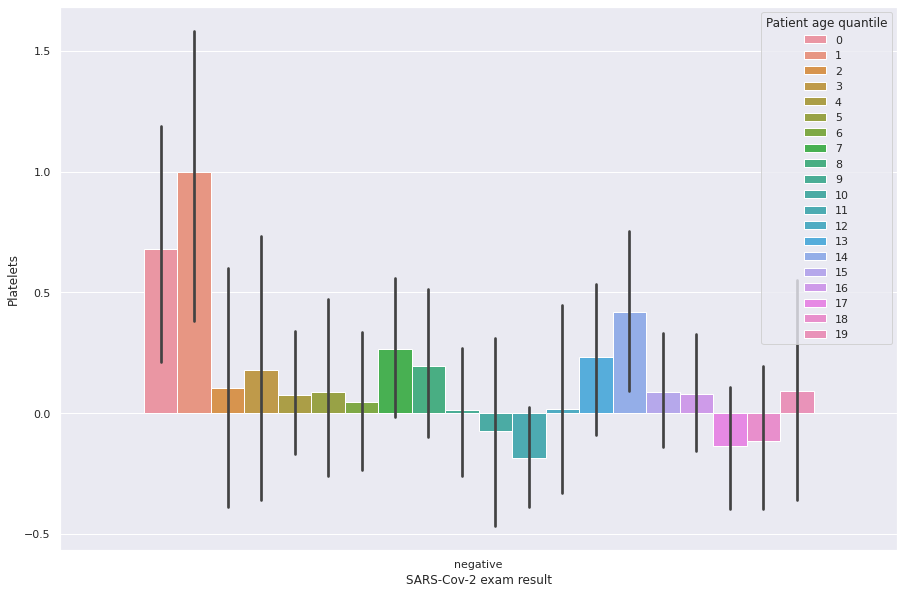

In [43]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="SARS-Cov-2 exam result", y="Platelets",data=Negative_cases,hue="Patient age quantile")
plt.show()

In [52]:
x=Positive_cases['Patient age quantile']
y=Positive_cases['Platelets']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
Lr=LinearRegression()

In [67]:
Lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred=Lr.predict(np.array(x_test).reshape(-1,1))

In [59]:
from sklearn.metrics import mean_squared_error

In [61]:
mean_squared_error(x_test,y_pred)

208.32796250916476

In [72]:
Lr.predict(np.array([[17]]))

array([[-0.74527244]])